In [1]:
import sys
sys.path.append("..")

import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from src.graphgen.graph_analyzer import *


In [2]:
analyzer = GraphAnalyzer('data/biodomain_edge_indices/Epigenetic.npy',
                         'data/biodomain_edge_indices/num_nodes.json',
                         'Epigenetic')

In [3]:
for key, value in analyzer.calculate_graph_properties().items():
    print(key)
    print(value)


Loaded Graph
{'Number of Nodes': 271, 'Number of Edges': 3683, 'Average Degree': '27.181', 'Clustering Coefficient': '0.376', 'Betweenness Centrality': '0.0043', 'Modularity': '0.256', 'Assortativity': '-0.018'}
Erdos-Renyi
{'Number of Nodes': 271, 'Number of Edges': 3701, 'Average Degree': '27.314', 'Clustering Coefficient': '0.100', 'Betweenness Centrality': '0.0035', 'Modularity': '0.142', 'Assortativity': '0.009'}
Barabasi-Albert
{'Number of Nodes': 271, 'Number of Edges': 1330, 'Average Degree': '9.815', 'Clustering Coefficient': '0.095', 'Betweenness Centrality': '0.0059', 'Modularity': '0.264', 'Assortativity': '-0.078'}
Watts-Strogatz
{'Number of Nodes': 271, 'Number of Edges': 542, 'Average Degree': '4.000', 'Clustering Coefficient': '0.300', 'Betweenness Centrality': '0.0170', 'Modularity': '0.743', 'Assortativity': '-0.120'}


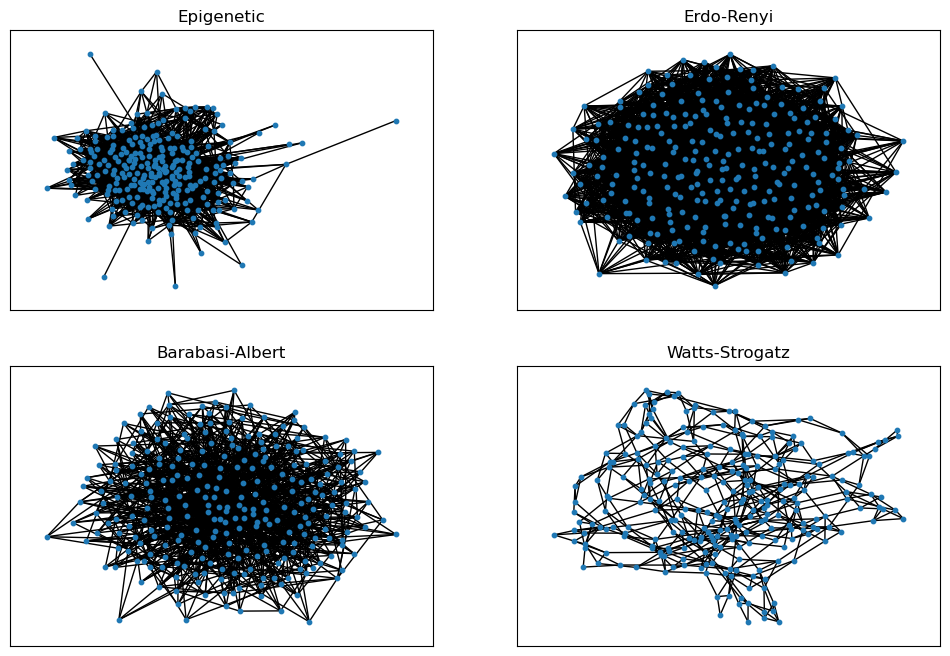

In [4]:
analyzer.visualize_graph()

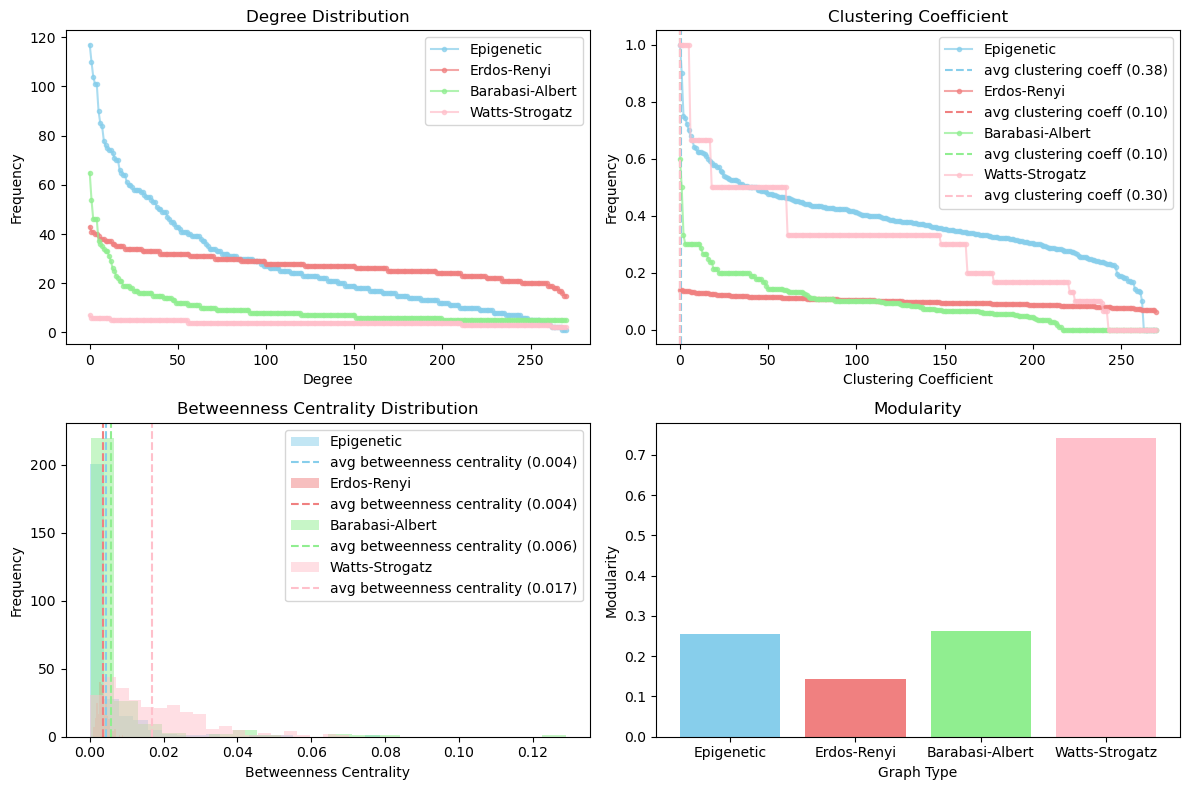

In [5]:
analyzer.visualize_distribution()

In [2]:
import glob

dataset_files = {}
for file in glob.glob('data/biodomain_edge_indices/*.npy'):
    dataset_files[file.split('/')[-1].split('.')[0]] = file

In [2]:
import glob
from tqdm import tqdm

with open('gene_graph_analysis.txt', 'w') as f:
    f.write('Gene Graph Analysis\n')
    for file_name, file_path in tqdm(dataset_files.items()):
        f.write(f'\nDATASET: {file_name}\n')
        analyzer = GraphAnalyzer(file_path, 'data/biodomain_edge_indices/num_nodes.json', file_name)
        for graph_type, properties in analyzer.calculate_graph_properties().items():
            f.write(f'{graph_type}: {properties}\n')

# Get a list of dataset files
dataset_files = glob.glob('data/biodomain_edge_indices/*.npy')

with open('gene_graph_analysis.txt', 'w') as f:
    f.write('Gene Graph Analysis\n')

    for file_path in tqdm(dataset_files):
        file_name = file_path.split('/')[-1].split('.')[0]
        with open('gene_graph_analysis.txt', 'a') as f:
            f.write(f'\nDATASET: {file_name}\n')

        analyzer = GraphAnalyzer(file_path, 'data/biodomain_edge_indices/num_nodes.json', file_name)
        graph_properties = analyzer.calculate_graph_properties()

        with open('gene_graph_analysis.txt', 'a') as f:
            for graph_type, properties in graph_properties.items():
                f.write(f'{graph_type}: {properties}\n')

  0%|          | 0/18 [00:00<?, ?it/s]

100%|██████████| 18/18 [59:13<00:00, 197.44s/it]  
